# 绘制数据分布的散点图和热力图
## 数据集计处理
绘制数据分布的时候,首先第一步还是将数据集计,得到每一个小范围内的数据量是多少.

In [1]:
import pandas as pd 
#读取数据
data = pd.read_csv('/home/liu/Documents/pygeo-tutorial/data-sample/TaxiData-Sample',header = None)
#给数据命名列
data.columns = ['VehicleNum','Stime','Lng','Lat','OpenStatus','Speed']

In [2]:
#筛选范围内数据
bounds = [113.7,22.42,114.3,22.8]
data = data[(data['Lng']>bounds[0])&(data['Lng']<bounds[2])&(data['Lat']>bounds[1])&(data['Lat']<bounds[3])]

In [3]:
#经纬度小数点保留三位小数
data2 = data[['Lng','Lat']].round(3).copy()

#集计每个小范围内数据量
data2['count'] = 1
data2 = data2.groupby(['Lng','Lat'])['count'].count().reset_index()

#排序数据,让数据量小的放上面先画,数据大的放下面最后画
data2.sort_values(by = 'count')
data2.head(5)

,Lng,Lat,count
0,113.701,22.779,1
1,113.703,22.779,1
2,113.715,22.781,1
3,113.717,22.780,1
4,113.723,22.769,1


## 散点图绘制


In [4]:
import plot_map
import imp
imp.reload(plot_map)

<module 'plot_map' from '/home/liu/Documents/jupyter/用Python分析时空数据的教程/plot_map.py'>

imgsavepath do not exist, your tile map will not save


/home/liu/miniconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


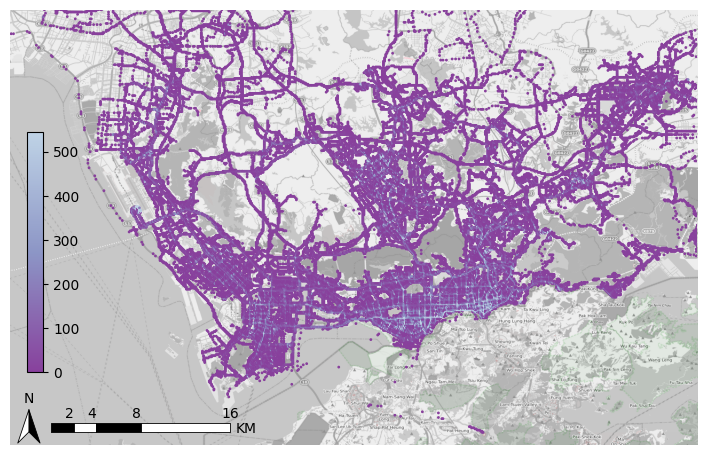

In [5]:
bounds = [113.7, 22.42, 114.3, 22.8]

import matplotlib as mpl
import matplotlib.pyplot as plt
import plot_map
import seaborn as sns
fig     = plt.figure(1,(8,8),dpi = 100)    
ax      = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))

#背景
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)


#colorbar
pallete_name = "BuPu"
colors = sns.color_palette(pallete_name, 3)
colors.reverse()
cmap = mpl.colors.LinearSegmentedColormap.from_list(pallete_name, colors)
vmax = data2['count'].quantile(0.99)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)


#plot scatters
plt.scatter(data2['Lng'],data2['Lat'],s = 1,alpha = 1,c = data2['count'],cmap = cmap,norm=norm )
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

# 加比例尺和指北针
plot_map.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03])

#假的 colorbar
plt.imshow([[0,vmax]], cmap=cmap)
cax = plt.axes([0.13, 0.33, 0.02, 0.3])
plt.colorbar(cax=cax)

plt.show()
##########################################################

## 热力图绘制(countourf)
热力图绘制这里采用plt的contourf函数绘制,而countour所传入的参数是一个矩阵形式
`plt.countourf(x,y,z, levels = levels, cmap = cmap,origin = 'lower' )`
* x -- 一维横坐标
* y -- 一维纵坐标
* z -- 二维矩阵值
* levels -- 分层的颜色
因此我们用pd.pivot透视表来生成x,y,z  
在这里我对z取一个log,这样可视化出来效果更优美  

In [6]:
import numpy as np
d = data2.pivot(columns = 'Lng',index = 'Lat', values = 'count').fillna(0)#fillna(0)将NAN值转换为0
#将一个dataframe的记录数据整合成表格，而且是按照pivot(‘index=xx’,’columns=xx’,’values=xx’)来整合的
z = np.log(d.values)
x = d.columns
y = d.index
levels = np.linspace(0,z.max(),25)#通过定义均匀间隔创建数值序列

/home/liu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


imgsavepath do not exist, your tile map will not save


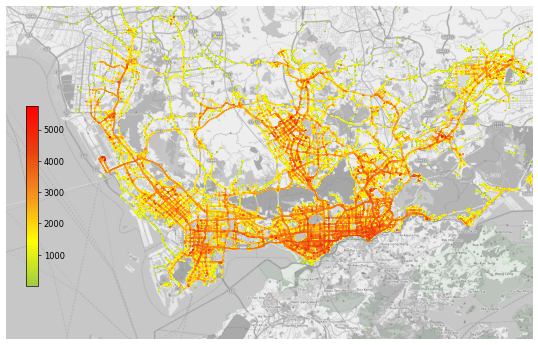

In [9]:
bounds = [113.7,22.42,114.3,22.8]

#导入绘图包
import matplotlib as mpl 
import matplotlib.pyplot as plt
import plot_map
import seaborn as sns
import numpy as np

#---画布--
fig = plt.figure(1,(10,10),dpi = 60)
ax = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))#调整整体空白
                 
#绘制底图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)

#colorbar的数据
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)

#绘制热力图
plt.contourf(x,y,z, levels=levels, cmap=cmap,origin = 'lower')


plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

#绘制假的colorbar
plt.imshow([np.exp(levels)], cmap=cmap)
cax = plt.axes([0.13, 0.32, 0.02, 0.3])
plt.colorbar(cax=cax)


plt.show()